In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [3]:
# all the constants are in CGS units
# physical constants
sigma = 5.67051e-5 # Stefan-Boltzmann constant erg cm-2 K-4 s-1
k = 1.380658e-16 # Boltzmann constant erg k-1
m_u = 1.6605402e-24 # Atomic mass unit g
G = 6.67259e-8 # Gravitational constant cm3 g-1 s-2
h = 6.6260755e-27 # Planck constant erg s
c = 2.99792458e10 # speed of light in a vacuum cm s-1
year = 3.14e7
pc = 3.086e18

e = 4.8032068e-10 # Electron charge esu
m_e = 9.1093897e-28 # Mass of electron g
# distance
au = 1.496e13

# earth
r_earth = 6.378e8 # cm
m_earth = 5.974e27 # g
m_j_r = 317.89

# sun
m_sun = 1.99e33
L_sun = 3.9e33 # Solar luminosity erg s-1

# Exercise 1

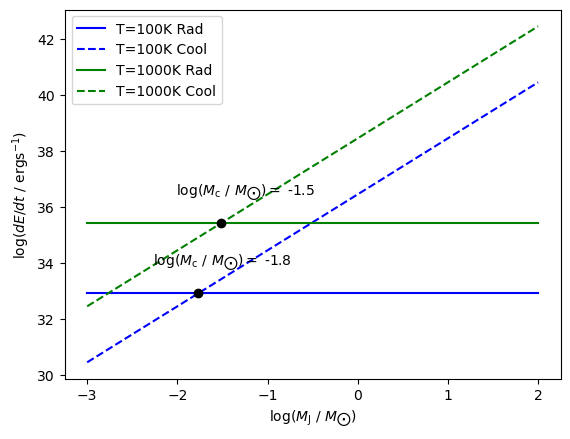

In [47]:
Ms = np.logspace(-3, 2, 50)
Ts = [100, 1000]
m = 2*m_u
colors = ['blue', 'green']

fig, ax = plt.subplots()

for i,t in enumerate(Ts):
    rad = (2*np.sqrt(2))/(np.pi*G)*(5*k*t/(m))**(5/2)*np.ones_like(Ms)
    cool = 4*np.pi*sigma*((G*m)/(5*k))**2*(Ms *m_sun)**2*t**2
    a = (2*np.sqrt(2))/(np.pi*G)*(5*k*t/(m))**(5/2)
    Mc = (a/(4*np.pi*sigma))**0.5 * (5*k)/(G*m*t)
    ax.scatter(np.log10(Mc/m_sun), np.log10(a), color='k', zorder=2)
    ax.text(np.log10(Mc/m_sun)-0.5, np.log10(a)+1, r'$\log (M_{\mathrm{c}}\ / \ M_\bigodot)=$ %.1f'%np.log10(Mc/m_sun))
    ax.plot(np.log10(Ms), np.log10(rad), linestyle='-', color=colors[i], label=f'T={t}K Rad', zorder=1)
    ax.plot(np.log10(Ms), np.log10(cool), linestyle='--', color=colors[i], label=f'T={t}K Cool', zorder=1)
    
ax.legend()
ax.set_xlabel(r'$\log (M_{\mathrm{J}}\ / \ M_\bigodot)$')
ax.set_ylabel(r'$\log (d E/d t \ / \ \mathrm{ergs}^{-1})$')
plt.savefig('frag.png', dpi=200)
plt.show()

# Exercise 2

In [6]:
(10*(1e6)**2*pc*8/3600*np.pi/180)/(np.pi*G*m_sun*4.9e-4)

5855.544774183259

In [2]:
import scipy.integrate as si
def f(x):
    y = (1+x**2)**(-5/2) * x/np.sqrt(x**2 - 0.64**2)
    return y
si.quad(f,0.64,1)[0]

0.24653597282004813

# Exercise 3

In [23]:
def n1(x):
    f = np.exp(-(np.log10(x) - np.log10(0.22))**2/0.65)/x
    return f

def n2(x):
    f = np.exp(-(-np.log10(0.22))**2/0.65)/x**2.35
    return f

def m1(x):
    f = np.exp(-(np.log10(x) - np.log10(0.22))**2/0.65)
    return f

def m2(x):
    f = np.exp(-(-np.log10(0.22))**2/0.65)/x**1.35
    return f

In [26]:
import scipy.integrate as si
norm = si.quad(n1,0,1)[0] + si.quad(n2,1,np.inf)[0]
n_frac = si.quad(n1,0,0.075)[0] / norm
print(n_frac*100)
norm = si.quad(m1,0,1)[0] + si.quad(m2,1,np.inf)[0]
m_frac = si.quad(m1,0,0.075)[0] / norm
print(m_frac*100)

20.795441526795017
1.273707174914033


# Exercise 4

In [12]:
(np.sqrt(200*k*m_sun/(2.3*m_u*G*au**3))/(2e3*np.pi))**(4/3)

138.57833281460393

In [14]:
((k*200)/(2.3*m_u))**2/(G**2*2e3) /(m_j_r*m_earth)

3.0911266406467277

# Exercise 5

In [7]:
rs = np.array([1, 10, 100])*au
ts = rs**(3/2)/(2*1e-3*np.sqrt(G*m_sun)) / year
for t in ts:
    print('%.2e'%t)

8.00e+01
2.53e+03
8.00e+04


# Exercise 6

In [31]:
# no gravity focusing
rs = np.array([0.1, 1, 10])
Sigmas = 10/xs
Omegas = np.sqrt(G*m_sun/(rs*au)**3)
Rrhos = 3*m_earth/(4*np.pi*r_earth**2)
ts = Rrhos/(Sigmas*Omegas) / year
for t in ts:
    print('%.2e'%t)

1.77e+05
5.61e+07
1.77e+10


In [38]:
# differential equation
e = 0.01
tgs = np.log(1+(2*G*m_earth)/(r_earth*dv**2))*dv**2/(8*G*Sigmas*Omegas*r_earth) / year
for t in tgs:
    print('%.2e'%t)

3.13e+03
1.38e+05
5.59e+06


In [ ]:
# gravity focusing wrong
e = 0.01
dv = 2*e*rs*au*Omegas/np.pi
f = 2*G*m_earth / (r_earth*dv**2)
tgs = ts/(1+f)
for t in tgs:
    print('%.2e'%t)